In [23]:
#10/9/24 Analyses FP Results

import pandas as pd
import numpy as np

In [24]:
#Read NN results
#this is in a text file as the model creator cannot keep variables to maintain memory limits

with open('/Users/james/Documents/Honours/Results/Figure_Development/Fingerprints/modeloutputs/FPNNResults.txt', 'r') as file:
    text = file.read()
    
import re

pattern = re.compile(r'\bmcc = .+$', re.MULTILINE)
lines = pattern.findall(text)

# Print or process the matching lines
results = []
for line in lines:
    results.append(float(line[6:]))

In [25]:
import os
datasets = []
index = []
directory = '/Users/james/Documents/Honours/Results/Model_Outputs/'
namelist = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if 'csv' in filename:
        pathname = directory + file
        df = pd.read_csv(pathname)
        datasets.append(df)
        namelist.append(filename)

In [26]:
namelist

['SVM_Fingerprint_Results.csv',
 'RF_Fingerprint_Results.csv',
 'KNN_Fingerprint_Results.csv']

In [51]:
index = ['SVM', 'RF', 'KNN', 'NN']

In [28]:
mcclist = []
for data in datasets:
    mcclist.append(data['MCC'].values.tolist())
mcclist.append(results)

In [29]:
rf = 0
svm = 0
knn = 0
nn = 0
for item in mcclist[0]:
    svm = svm + item
for item in mcclist[1]:
    rf = rf + item
for item in mcclist[2]:
    knn = knn + item
for item in mcclist[3]:
    nn = nn + item

In [30]:
print(svm, rf, knn, nn)

10.125031196754726 9.994398804048364 8.40956166330152 9.02981037471998


In [31]:
datalist = datasets[0]['Dataset'].values
temp = []
for item in datalist:
    temp.append(item[:-4])
datalist = temp

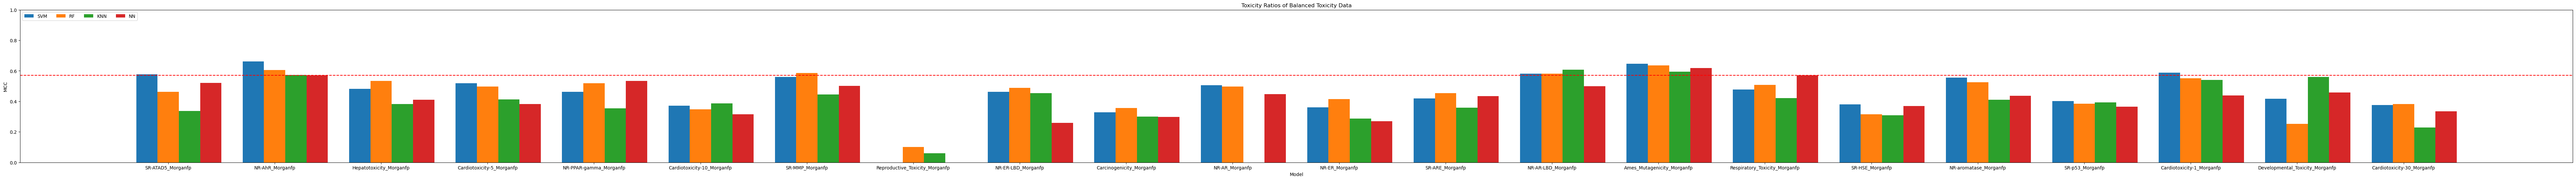

In [10]:
import matplotlib.pyplot as plt
data = mcclist

models = ('Sample Count', 'Positive Samples', 'Negative Samples')
x = np.arange(len(datalist))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0


fig, ax = plt.subplots(figsize=(100, 6))
for measurement in data:
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=index[multiplier])
    multiplier += 1

ax.set_ylabel('MCC')
ax.set_xlabel('Model')
ax.set_title('Toxicity Ratios of Balanced Toxicity Data')
ax.set_xticks(x + width, datalist)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1)
plt.axhline(y=0.57, color='r', linestyle='--', label='Quality Threshold (0.57)')

plt.show()

In [11]:
import statistics
meanvals = []
loops = 0
for val in mcclist[0]:
    currdata = []
    for item in mcclist:
        currdata.append(item[loops])
    
    mean = statistics.mean(currdata)
    meanvals.append(mean)
    loops +=1

In [12]:
loops = 0
for val in meanvals:
    print(datalist[loops], ':', val)
    
    loops += 1

SR-ATAD5_Morganfp : 0.4746612423348123
NR-AhR_Morganfp : 0.6022502941827985
Hepatotoxicity_Morganfp : 0.4515123517282692
Cardiotoxicity-5_Morganfp : 0.4525353538181742
NR-PPAR-gamma_Morganfp : 0.46689300675935075
Cardiotoxicity-10_Morganfp : 0.35494091621950996
SR-MMP_Morganfp : 0.5225777613569534
Reproductive_Toxicity_Morganfp : 0.0399403576166799
NR-ER-LBD_Morganfp : 0.4156235807964902
Carcinogenicity_Morganfp : 0.3204353459805035
NR-AR_Morganfp : 0.3623271880015464
NR-ER_Morganfp : 0.3333210558932519
SR-ARE_Morganfp : 0.416086805655468
NR-AR-LBD_Morganfp : 0.5677087837899132
Ames_Mutagenicity_Morganfp : 0.6230438343966151
Respiratory_Toxicity_Morganfp : 0.49474406078405025
SR-HSE_Morganfp : 0.3431568755081544
NR-aromatase_Morganfp : 0.4815059257149278
SR-p53_Morganfp : 0.38574801516328333
Cardiotoxicity-1_Morganfp : 0.5290284728906068
Developmental_Toxicity_Morganfp : 0.4214225954000797
Cardiotoxicity-30_Morganfp : 0.3302366857147103


In [13]:
loops = 0

srindex = []
nrindex = []
devrepindex = []
cardioindex = []
otherindex = []

for item in datalist:
    if 'SR-' in item:
        srindex.append(loops)
    if 'NR-' in item:
        nrindex.append(loops)
    if 'Cardio' in item:
        cardioindex.append(loops)
        cardionames.append(item)
    if 'Develop' in item or 'Repro' in item:
        devrepindex.append(loops)
        devrepnames.append(item)
    if 'Mutag' in item or 'Carc' in item or 'Resp' in item or 'Hepa' in item:
        otherindex.append(loops)
        othernames.append(item)
    loops += 1
    
superlist = [srindex, nrindex, devrepindex, cardioindex, otherindex]

NameError: name 'othernames' is not defined

In [ ]:
graphorder = ['Endocrine SR', 'Endocrine NR', 'Developmental & Reproductive', 'Cardiotoxicity', 'Remaining Datasets']

In [ ]:
iterations = 0
for curr in superlist:
    endovals = [[], [], [], []]
    endonames = []
    for val in  curr:
        endovals[0].append(mcclist[0][val])
        endovals[1].append(mcclist[1][val])
        endovals[2].append(mcclist[2][val])
        endovals[3].append(mcclist[3][val])
        endonames.append(datalist[val])

    import matplotlib.pyplot as plt
    data = endovals

    x = np.arange(len(curr))  # the label locations
    width = 0.2  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(figsize=(20, 2))
    for measurement in data:
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=index[multiplier])
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('MCC')
    ax.set_xlabel('Model')
    graphname = graphorder[iterations] + ' Fingerprint Results'
    ax.set_title(graphname)
    ax.set_xticks(x + width, endonames)
    ax.legend(loc='upper left', ncols=4)
    ax.set_ylim(0, 1)
    plt.axhline(y=0.57, color='r', linestyle='--', label='Quality Cutoff (0.57)')

    plt.show()
    iterations +=1

In [ ]:
#############
#the order of the results is out of whack, the next section simply moves the order of the graphs, it does not change 
#any results
#just so the preso looks pretty :D

In [ ]:
curr = devrepindex
curr = [20,7]
endovals = [[], [], [], []]
endonames = []
for val in  curr:
    endovals[0].append(mcclist[0][val])
    endovals[1].append(mcclist[1][val])
    endovals[2].append(mcclist[2][val])
    endovals[3].append(mcclist[3][val])
    endonames.append(datalist[val])

endonames = ['Developmental_Toxicity_Morganfp', 'Reproductive_Toxicity_Morganfp']

data = endovals

x = np.arange(len(curr))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(20, 2))
for measurement in data:
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=index[multiplier])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MCC')
ax.set_xlabel('Model')
graphname = graphorder[2] + ' Fingerprint Results'
ax.set_title(graphname)
ax.set_xticks(x + width, endonames)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1)
plt.axhline(y=0.57, color='r', linestyle='--', label='Quality Cutoff (0.57)')

plt.show()
iterations +=1

In [ ]:
endonames

In [ ]:
curr = cardioindex
curr = [19,3,5,21]
endovals = [[], [], [], []]
endonames = []
for val in  curr:
    endovals[0].append(mcclist[0][val])
    endovals[1].append(mcclist[1][val])
    endovals[2].append(mcclist[2][val])
    endovals[3].append(mcclist[3][val])
    endonames.append(datalist[val])
data = endovals

x = np.arange(len(curr))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(20, 2))
for measurement in data:
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=index[multiplier])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MCC')
ax.set_xlabel('Model')
graphname = graphorder[3] + ' Fingerprint Results'
ax.set_title(graphname)
ax.set_xticks(x + width, endonames)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1)
plt.axhline(y=0.57, color='r', linestyle='--', label='Quality Cutoff (0.57)')

plt.show()
iterations +=1

In [ ]:
endonames

In [ ]:
devrepvals = [[], [], [], []]
devrepnames = []
for val in devrepindex:
    devrepvals[0].append(mcclist[0][val])
    devrepvals[1].append(mcclist[1][val])
    devrepvals[2].append(mcclist[2][val])
    devrepvals[3].append(mcclist[3][val])
    devrepnames.append(datalist[val])
    
import matplotlib.pyplot as plt
data = devrepvals

x = np.arange(len(devrepindex))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(15, 6))
for measurement in data:
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=index[multiplier])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MCC')
ax.set_xlabel('Model')
ax.set_title('Chemopy Development & Reproductive Toxicity Analysis')
ax.set_xticks(x + width, devrepnames)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1)
plt.axhline(y=0.5, color='r', linestyle='--', label='y=0.5')
plt.axhline(y=0.25, color='b', linestyle='--', label='y=0.25')


plt.show()

In [ ]:
mutacarcheparespvals = [[], [], [], []]
mutacarcheparespnames = []
for val in mutacarcheparespindex:
    mutacarcheparespvals[0].append(mcclist[0][val])
    mutacarcheparespvals[1].append(mcclist[1][val])
    mutacarcheparespvals[2].append(mcclist[2][val])
    mutacarcheparespvals[3].append(mcclist[3][val])
    mutacarcheparespnames.append(datalist[val])
    
import matplotlib.pyplot as plt
data = mutacarcheparespvals

x = np.arange(len(mutacarcheparespindex))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(15, 6))
for measurement in data:
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=index[multiplier])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MCC')
ax.set_xlabel('Model')
ax.set_title('Remaining Datasets')
ax.set_xticks(x + width, mutacarcheparespnames)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1)
plt.axhline(y=0.5, color='r', linestyle='--', label='y=0.5')
plt.axhline(y=0.25, color='b', linestyle='--', label='y=0.25')

plt.show()

In [ ]:
import sys
sys.path.insert(1, '/Users/james/Documents/Honours/Python') 
from Function_Repo import setbalance
import math


seed = 81
#Data import
rawdata = []
directory = '/Users/james/Documents/Honours/Data/ProcessedRaws/'
names = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if 'csv' in filename:
        pathname = directory + file
        df = pd.read_csv(pathname)
        df = setbalance(df)
        rawdata.append(df)
        names.append(filename[:-4])

In [ ]:
samplecount = []
for item in rawdata:
    samplecount.append(len(item['Toxicity_Value'].values))

In [ ]:
curr = otherindex
curr = 2,15,14,9
endovals = [[], [], [], []]
endonames = []
for val in  curr:
    endovals[0].append(mcclist[0][val])
    endovals[1].append(mcclist[1][val])
    endovals[2].append(mcclist[2][val])
    endovals[3].append(mcclist[3][val])
    endonames.append(datalist[val])
data = endovals

x = np.arange(len(curr))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(20, 2))
for measurement in data:
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=index[multiplier])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MCC')
ax.set_xlabel('Model')
graphname = graphorder[4] + ' Fingerprint Results'
ax.set_title(graphname)
ax.set_xticks(x + width, endonames)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1)
plt.axhline(y=0.57, color='r', linestyle='--', label='Quality Cutoff (0.57)')

plt.show()
iterations +=1

In [ ]:
total = 0
for item in mcclist:
    for thing in item:
        total = thing + total
bing = total / 88
print(bing)

In [32]:
fpvals = mcclist
fpdata = datalist

In [142]:
#Read NN results
#this is in a text file as the model creator cannot keep variables to maintain memory limits

with open('/Users/james/Documents/Honours/Results/Figure_Development/Chemopy/resultsdata/ChemopyNN_out.txt', 'r') as file:
    text = file.read()
    
import re

pattern = re.compile(r'\bmcc = .+$', re.MULTILINE)
lines = pattern.findall(text)

# Print or process the matching lines
results = []
for line in lines:
    results.append(float(line[6:]))
    
import os
datasets = []
index = []
directory = '/Users/james/Documents/Honours/Results/Figure_Development/Chemopy/resultsdata/'
namelist = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if 'csv' in filename:
        pathname = directory + file
        df = pd.read_csv(pathname)
        datasets.append(df)
        namelist.append(filename)

chemopydata = datasets[0]['Dataset'].values
temp = []
for item in chemopydata:
    temp.append(item[:-4])
chemopydata = temp
        
chemopyvals = []
for data in datasets:
    chemopyvals.append(data['MCC'].values.tolist())
chemopyvals.append(results)
print(namelist)
#Read NN results
#this is in a text file as the model creator cannot keep variables to maintain memory limits

with open('/Users/james/Documents/Honours/Results/Figure_Development/PaDEL/data/padelNNout.txt', 'r') as file:
    text = file.read()
    
import re

pattern = re.compile(r'\bmcc = .+$', re.MULTILINE)
lines = pattern.findall(text)

# Print or process the matching lines
results = []
for line in lines:
    results.append(float(line[6:]))
    
import os
datasets = []
index = []
directory = '/Users/james/Documents/Honours/Results/Figure_Development/PaDEL/data/'
namelist = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if 'csv' in filename:
        pathname = directory + file
        df = pd.read_csv(pathname)
        datasets.append(df)
        namelist.append(filename)

padeldata = datasets[0]['Dataset'].values
temp = []
for item in padeldata:
    temp.append(item[:-4])
padeldata = temp
        
temp = datasets[0]
datasets[0] = datasets[1]
datasets[1] = temp        

padelvals = []
for data in datasets:
    padelvals.append(data['MCC'].values.tolist())
padelvals.append(results)
print(namelist)
#Read NN results
#this is in a text file as the model creator cannot keep variables to maintain memory limits

with open('/Users/james/Documents/Honours/Results/Figure_Development/DrugBank Targets/modelout/drugbankNNout.txt', 'r') as file:
    text = file.read()
    
import re

pattern = re.compile(r'\bmcc = .+$', re.MULTILINE)
lines = pattern.findall(text)

# Print or process the matching lines
results = []
for line in lines:
    results.append(float(line[6:]))
    
import os
datasets = []
index = []
directory = '/Users/james/Documents/Honours/Results/Figure_Development/DrugBank Targets/modelout/'
namelist = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if 'csv' in filename:
        pathname = directory + file
        df = pd.read_csv(pathname)
        datasets.append(df)
        namelist.append(filename)

targetdata = datasets[0]['Dataset'].values
temp = []
for item in targetdata:
    temp.append(item[:-4])
targetdata = temp        

temp = datasets[1]
datasets[1] = datasets[0]
datasets[0] = temp

temp = namelist[1]
namelist[1] = namelist[0]
namelist[0] = temp

targetvals = []
for data in datasets:
    targetvals.append(data['MCC'].values.tolist())
targetvals.append(results)
print(namelist)

['chemopy_svm.csv', 'chemopy_rf.csv', 'chemopy_knn.csv']
['padel_rf.csv', 'padel_svm.csv', 'padel_knn.csv']
['drugbank_svm.csv', 'drugbank_rf.csv', 'drugbank_knn.csv']


In [38]:
nameindex = [fpdata, chemopydata, padeldata, targetdata]
dataindex = [fpvals, chemopyvals, padelvals, targetvals]

In [48]:
meanfpvals = []
loops = 0
for item in fpvals[0]:
    temp = (fpvals[0][loops] + fpvals[1][loops] + fpvals[2][loops] + fpvals[3][loops]) / 4
    meanfpvals.append(temp)
    loops += 1
    
meanchemopyvals = []
loops = 0
for item in fpvals[0]:
    temp = (chemopyvals[0][loops] + chemopyvals[1][loops] + chemopyvals[2][loops] + chemopyvals[3][loops]) / 4
    meanchemopyvals.append(temp)
    loops += 1
    
meanpadelvals = []
loops = 0
for item in fpvals[0]:
    temp = (padelvals[0][loops] + padelvals[1][loops] + padelvals[2][loops] + padelvals[3][loops]) / 4
    meanpadelvals.append(temp)
    loops += 1
    
meantargetvals = []
loops = 0
for item in targetvals[0]:
    temp = (targetvals[0][loops] + targetvals[1][loops] + targetvals[2][loops] + targetvals[3][loops]) / 4
    meantargetvals.append(temp)
    loops += 1

In [319]:
meanfpvals

[0.4746612423348123,
 0.6022502941827985,
 0.4515123517282693,
 0.4525353538181743,
 0.46689300675935075,
 0.35494091621950996,
 0.5225777613569533,
 0.0399403576166799,
 0.4156235807964902,
 0.3204353459805035,
 0.3623271880015464,
 0.33332105589325184,
 0.4160868056554681,
 0.5677087837899133,
 0.6230438343966151,
 0.4947440607840502,
 0.3431568755081544,
 0.4815059257149278,
 0.3857480151632834,
 0.5290284728906068,
 0.4214225954000797,
 0.3302366857147103]

In [312]:
devindex = []
for rep in nameindex:
    loops = 0
    for name in rep:
        if 'ardiotoxicity-1' in name and '10' not in name:
            devindex.append(loops)
        loops += 1

In [313]:
devindex

[19, 6, 6, 0]

In [305]:
temp = []
for item in targetvals:
    temp.append(item[0])

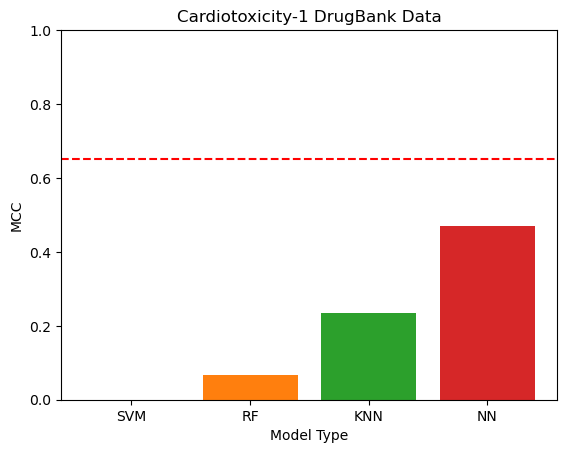

In [315]:
import matplotlib.pyplot as plt
#data = [meanfpvals[devindex[0]], abs(meanchemopyvals[devindex[1]]), meanpadelvals[devindex[2]], meantargetvals[devindex[3]]]
data = [targetvals[0][devindex[3]], abs(targetvals[1][devindex[3]]), targetvals[2][devindex[3]], targetvals[3][devindex[3]]]
#data = meanmodelstats
#data = temp
values = data
#categories = ['MorganFP', 'ChemoPy', 'PaDEL', 'DrugBank']
categories = ['SVM', 'RF', 'KNN', 'NN']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
bars = plt.bar(categories, values, color=colors)


# Add a horizontal line at y = 0.57
plt.axhline(y=0.65, color='red', linestyle='--')

# Set y-axis limits
plt.ylim(0, 1)  # Adjust the upper limit based on your data

# Add labels and title
plt.xlabel('Model Type')
plt.ylabel('MCC')
plt.title('Cardiotoxicity-1 DrugBank Data')

# Show the plot
plt.show()

In [288]:
fpvals

[[0.5775064742878283,
  0.6603887227797506,
  0.480854877125666,
  0.5193099564030418,
  0.4615978730517827,
  0.3711153521238838,
  0.5588983394823899,
  0.0,
  0.4627017005358065,
  0.3277919631486701,
  0.5045381731276043,
  0.360980546963335,
  0.4185142511351999,
  0.5818429184443191,
  0.6454178938291891,
  0.4781752769308021,
  0.3804109233975316,
  0.5545779138333476,
  0.4012427832875904,
  0.5868310831530859,
  0.4166666666666667,
  0.375667507047237],
 [0.4632511391540115,
  0.6057622340798641,
  0.5330317753634951,
  0.4976444945946108,
  0.5179467772872011,
  0.348065274025202,
  0.5863241664917337,
  0.1,
  0.487670425490951,
  0.3560887510773948,
  0.4968030024467603,
  0.4156946743886325,
  0.4533787293352714,
  0.5818429184443191,
  0.634433058924186,
  0.5085112938598969,
  0.314423761344636,
  0.525117853414576,
  0.3838460077003889,
  0.5511343174274512,
  0.251259453814803,
  0.3821686953829813],
 [0.337435674707524,
  0.5723387958404564,
  0.381897590901659,
  0.4

In [140]:
len(dataindex)

4

In [163]:
modelstats = [[], [], [], []]
loops = 0
for reps in dataindex:
    loops = 0
    for model in reps:
        for val in model:
            modelstats[loops].append(val)
        loops += 1

In [284]:
len(modelstats[0])

85

In [165]:
meanmodelstats = []
for model in modelstats:
    meanmodelstats.append(statistics.mean(model))

In [316]:
loops = 0
for item in allvals:
    if item > 0.65:
        loops += 1
print(loops)

6


In [236]:
len(allvals)

340

In [237]:
good = 0
for items in allvals:
    if items < 0.2:
        good += 1
print(good)

86


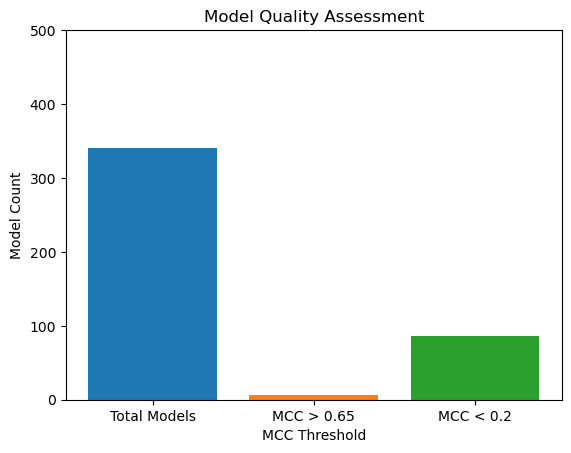

In [318]:
import matplotlib.pyplot as plt
#data = [fpvals[devindex[0]], abs(chemopyvals[devindex[1]]), padelvals[devindex[2]], targetvals[devindex[3]]]
#data = meanmodelstats
data = temp
values = [340, 6, 86]
categories = ['Total Models', 'MCC > 0.65', 'MCC < 0.2']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
bars = plt.bar(categories, values, color=colors)


# Add a horizontal line at y = 0.57

# Set y-axis limits
plt.ylim(0, 500)  # Adjust the upper limit based on your data

# Add labels and title
plt.xlabel('MCC Threshold')
plt.ylabel('Model Count')
plt.title('Model Quality Assessment')

# Show the plot
plt.show()